In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load File

file_path = f"D:\Projects\CustomerSatisfaction\customer_support_tickets.csv"
df = pd.read_csv(file_path)
print(df)

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_17316\4290681380.py:3: SyntaxWarning: invalid escape sequence '\P'
  file_path = f"D:\Projects\CustomerSatisfaction\customer_support_tickets.csv"


      Ticket ID        Customer Name              Customer Email  \
0             1        Marisa Obrien  carrollallison@example.com   
1             2         Jessica Rios    clarkeashley@example.com   
2             3  Christopher Robbins   gonzalestracy@example.com   
3             4     Christina Dillon    bradleyolson@example.org   
4             5    Alexander Carroll     bradleymark@example.com   
...         ...                  ...                         ...   
8464       8465           David Todd          adam28@example.net   
8465       8466           Lori Davis       russell68@example.com   
8466       8467      Michelle Kelley        ashley83@example.org   
8467       8468     Steven Rodriguez         fpowell@example.org   
8468       8469      Steven Davis MD          lori20@example.net   

      Customer Age Customer Gender       Product Purchased Date of Purchase  \
0               32           Other              GoPro Hero       2021-03-22   
1               42       

In [3]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [4]:
df.shape

(8469, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [6]:
#Drop Uneccessary Column

df = df.drop("Customer Email", axis=1)

In [7]:
df.shape

(8469, 16)

In [8]:
df['Customer Age'].unique()

array([32, 42, 48, 27, 67, 53, 24, 23, 60, 51, 65, 18, 63, 56, 19, 39, 28,
       66, 54, 35, 22, 21, 30, 36, 50, 33, 34, 44, 64, 37, 68, 69, 47, 40,
       41, 57, 61, 49, 46, 31, 55, 29, 62, 38, 58, 59, 20, 45, 43, 25, 52,
       70, 26], dtype=int64)

In [9]:
df['Customer Age'].max()

70

In [10]:
df['Customer Satisfaction Rating'].max()

5.0

In [11]:
df['Customer Satisfaction Rating'].min()

1.0

In [12]:
df['Customer Satisfaction Rating'].mean()

2.991332611050921

In [13]:
#Average Of First Response Time

df['First Response Time'] = pd.to_datetime(df['First Response Time'],format = '%Y-%m-%d %H:%M:%S')
average_time = df['First Response Time'].mean()
print("Average Time:", average_time)

Average Time: 2023-06-01 11:26:47.270265600


In [14]:
df['Ticket Priority'].unique()

array(['Critical', 'Low', 'High', 'Medium'], dtype=object)

In [15]:
df['Ticket Channel'].unique()

array(['Social media', 'Chat', 'Email', 'Phone'], dtype=object)

In [16]:
df['Ticket Status'].unique()

array(['Pending Customer Response', 'Closed', 'Open'], dtype=object)

In [17]:
count_PendingCustomerResponse = (df['Ticket Status'] == 'Pending Customer Response').sum()
print(count_PendingCustomerResponse)

2881


In [18]:
count_Closed = (df['Ticket Status'] == 'Closed').sum()
print(count_Closed)

2769


In [19]:
count_Open = (df['Ticket Status'] == 'Open').sum()
print(count_Open)

2819


In [20]:
df['Resolution'].isnull().sum()

5700

In [21]:
#Handaling Missing And Null Values

#Check Resolution null percentage 

missing_percentage = df['Resolution'].isnull().sum()/len(df)*100
print("Missing% : ",missing_percentage)

Missing% :  67.30428622033298


In [22]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '',text)
    return text

df['Clean_Description'] = df['Ticket Description'].apply(clean_text)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Clean_Description'])

for i in df[df['Resolution'].isnull()].index:
    sim_scores = cosine_similarity(tfidf_matrix[i],tfidf_matrix).flatten()
    sim_scores[i] = -1
    similar_idx = df[(~df['Resolution'].isnull())].index
    best_match_idx = similar_idx[sim_scores[similar_idx].argmax()]
    df.loc[i,'Resolution'] = df.loc[best_match_idx,'Resolution']

print(df[['Ticket ID','Ticket Description','Resolution']])

      Ticket ID                                 Ticket Description  \
0             1  I'm having an issue with the {product_purchase...   
1             2  I'm having an issue with the {product_purchase...   
2             3  I'm facing a problem with my {product_purchase...   
3             4  I'm having an issue with the {product_purchase...   
4             5  I'm having an issue with the {product_purchase...   
...         ...                                                ...   
8464       8465  My {product_purchased} is making strange noise...   
8465       8466  I'm having an issue with the {product_purchase...   
8466       8467  I'm having an issue with the {product_purchase...   
8467       8468  I'm having an issue with the {product_purchase...   
8468       8469  There seems to be a hardware problem with my {...   

                                         Resolution  
0               Happen describe scene majority ask.  
1                   Size him return financial tend.

In [23]:
df['Resolution'].isnull().sum()

0

In [24]:
# Example column
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')


In [25]:
print(df['First Response Time'].isnull().sum())


2819


In [26]:
median_response_time = df['First Response Time'].median()
df['First Response Time'] = df['First Response Time'].fillna(median_response_time)


In [27]:
print(df['First Response Time'].isnull().sum())  # Should be 0


0


In [28]:
for idx in df[df['Time to Resolution'].isnull()].index:
    # Cosine similarity with all tickets
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    
    # Ignore self similarity
    sim_scores[idx] = -1
    
    # Only consider tickets with non-null Time_to_Resolution
    valid_idx = df[df['Time to Resolution'].notnull()].index
    
    # Find most similar ticket
    best_match = valid_idx[sim_scores[valid_idx].argmax()]
    
    # Impute missing value
    df.loc[idx, 'Time to Resolution'] = df.loc[best_match, 'Time to Resolution']

# -------------------------
# Step 4: Check result
# -------------------------
print(df[['Ticket ID', 'Ticket Description', 'Time to Resolution']])
print("\nRemaining Nulls:", df['Time to Resolution'].isnull().sum())

      Ticket ID                                 Ticket Description  \
0             1  I'm having an issue with the {product_purchase...   
1             2  I'm having an issue with the {product_purchase...   
2             3  I'm facing a problem with my {product_purchase...   
3             4  I'm having an issue with the {product_purchase...   
4             5  I'm having an issue with the {product_purchase...   
...         ...                                                ...   
8464       8465  My {product_purchased} is making strange noise...   
8465       8466  I'm having an issue with the {product_purchase...   
8466       8467  I'm having an issue with the {product_purchase...   
8467       8468  I'm having an issue with the {product_purchase...   
8468       8469  There seems to be a hardware problem with my {...   

       Time to Resolution  
0     2023-06-01 21:49:59  
1     2023-06-01 16:47:00  
2     2023-06-01 18:05:38  
3     2023-06-01 01:57:40  
4     2023-06-01 19

In [29]:
for idx in df[df['Customer Satisfaction Rating'].isnull()].index:
    # Compute cosine similarity with all tickets
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    
    # Ignore self similarity
    sim_scores[idx] = -1
    
    # Only consider tickets with non-null ratings
    valid_idx = df[df['Customer Satisfaction Rating'].notnull()].index
    
    # Find most similar ticket
    best_match = valid_idx[sim_scores[valid_idx].argmax()]
    
    # Impute missing value
    df.loc[idx, 'Customer Satisfaction Rating'] = df.loc[best_match, 'Customer Satisfaction Rating']

# -------------------------
# Step 4: Verify
# -------------------------
print(df[['Ticket ID', 'Ticket Description', 'Customer Satisfaction Rating']])
print("\nRemaining Nulls:", df['Customer Satisfaction Rating'].isnull().sum())

      Ticket ID                                 Ticket Description  \
0             1  I'm having an issue with the {product_purchase...   
1             2  I'm having an issue with the {product_purchase...   
2             3  I'm facing a problem with my {product_purchase...   
3             4  I'm having an issue with the {product_purchase...   
4             5  I'm having an issue with the {product_purchase...   
...         ...                                                ...   
8464       8465  My {product_purchased} is making strange noise...   
8465       8466  I'm having an issue with the {product_purchase...   
8466       8467  I'm having an issue with the {product_purchase...   
8467       8468  I'm having an issue with the {product_purchase...   
8468       8469  There seems to be a hardware problem with my {...   

      Customer Satisfaction Rating  
0                              5.0  
1                              3.0  
2                              3.0  
3          

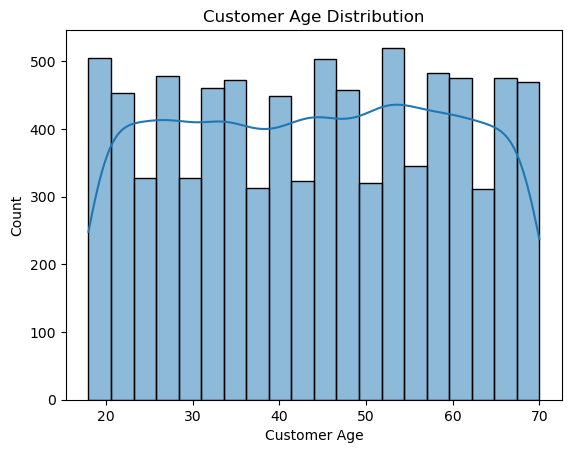

In [30]:
#now to eda 

#distribution of numerical columns

#customer age 

import seaborn as sns

sns.histplot(df['Customer Age'],bins=20,kde=True)
plt.title("Customer Age Distribution")
plt.show()

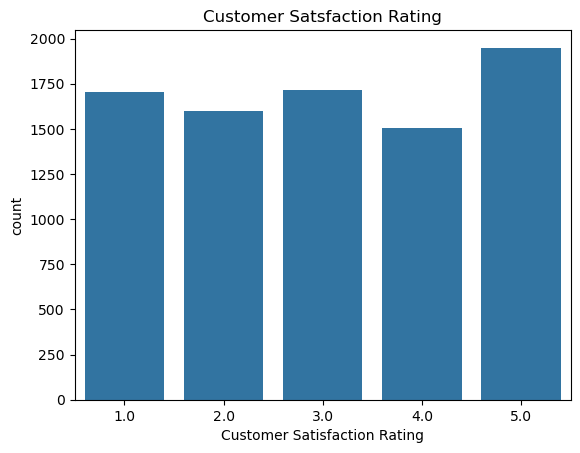

In [31]:
#customer rating distribution

sns.countplot(x='Customer Satisfaction Rating',data = df)
plt.title("Customer Satsfaction Rating")
plt.show()

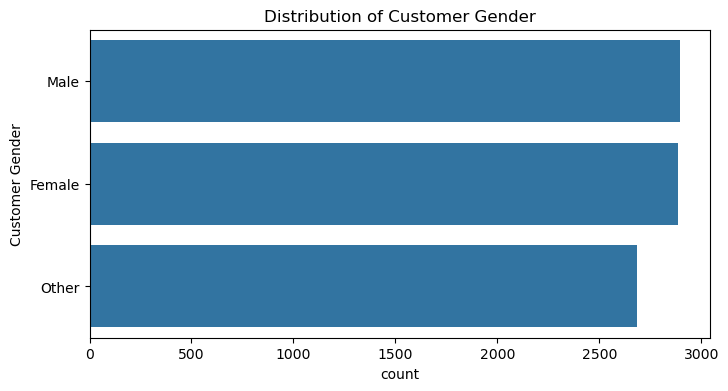

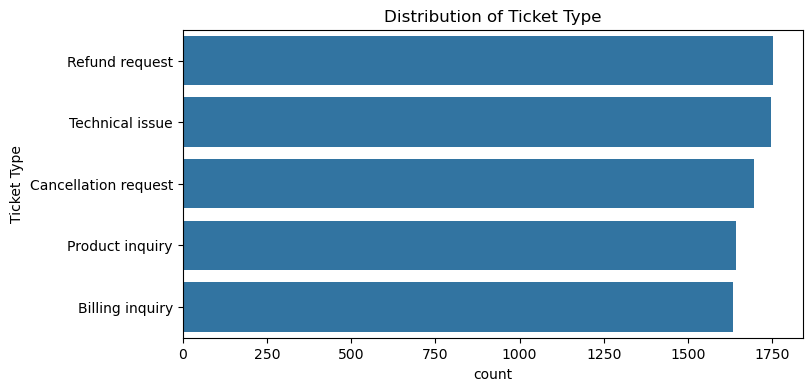

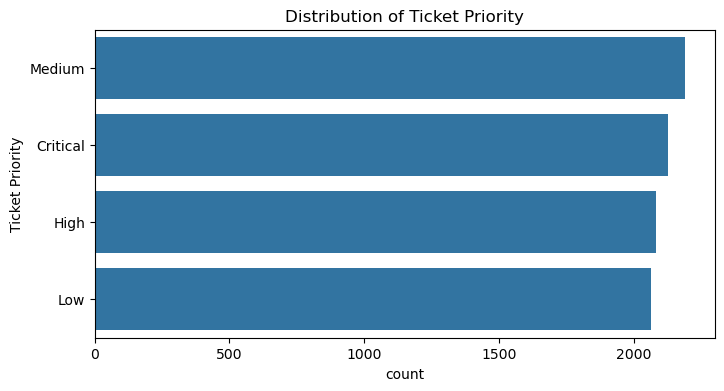

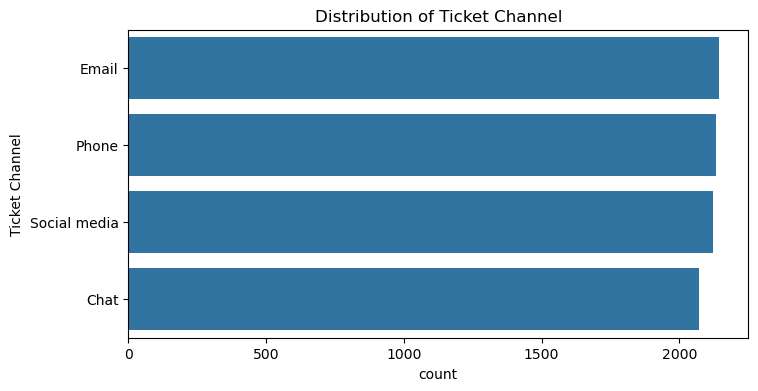

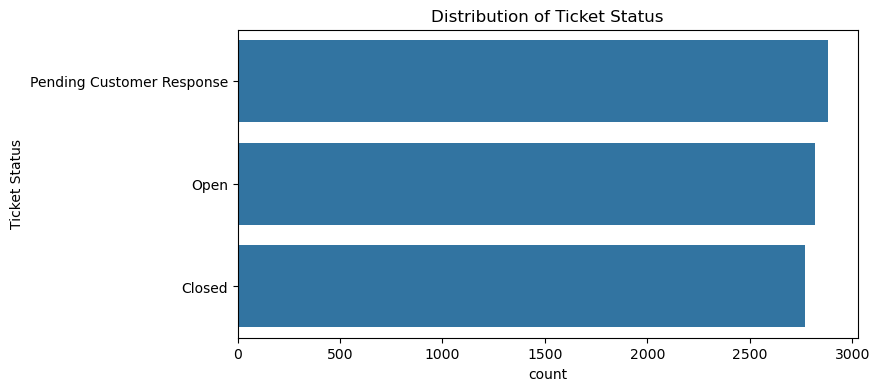

In [32]:
#categorical analysis

categorical_cols = ['Customer Gender', 'Ticket Type', 
                    'Ticket Priority', 'Ticket Channel', 'Ticket Status']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


In [33]:
# Make sure Date of Purchase is datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Calculate durations in hours
df['First_Response_Hours'] = (df['First Response Time'] - df['Date of Purchase']).dt.total_seconds() / 3600
df['Resolution_Hours'] = (df['Time to Resolution'] - df['Date of Purchase']).dt.total_seconds() / 3600


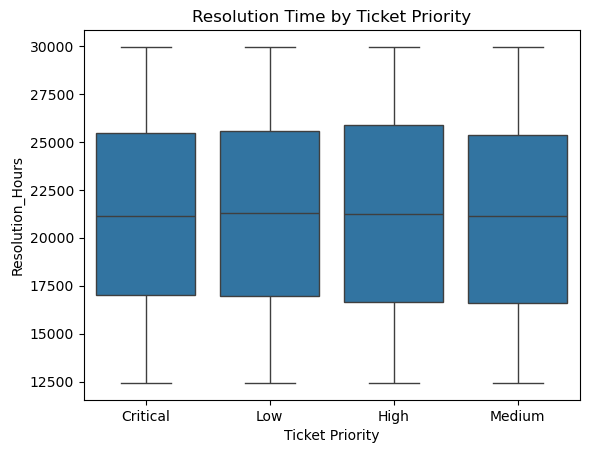

In [34]:
#relationship analysis

#How Ticket Priority affects Resolution Time or Customer Satisfaction:

sns.boxplot(x='Ticket Priority', y='Resolution_Hours', data=df)
plt.title("Resolution Time by Ticket Priority")
plt.show()

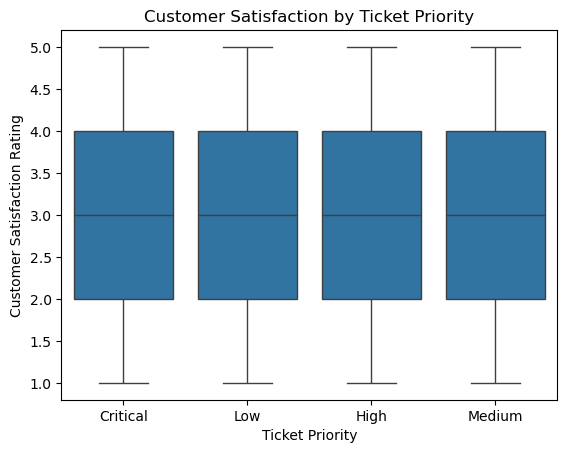

In [35]:
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df)
plt.title("Customer Satisfaction by Ticket Priority")
plt.show()

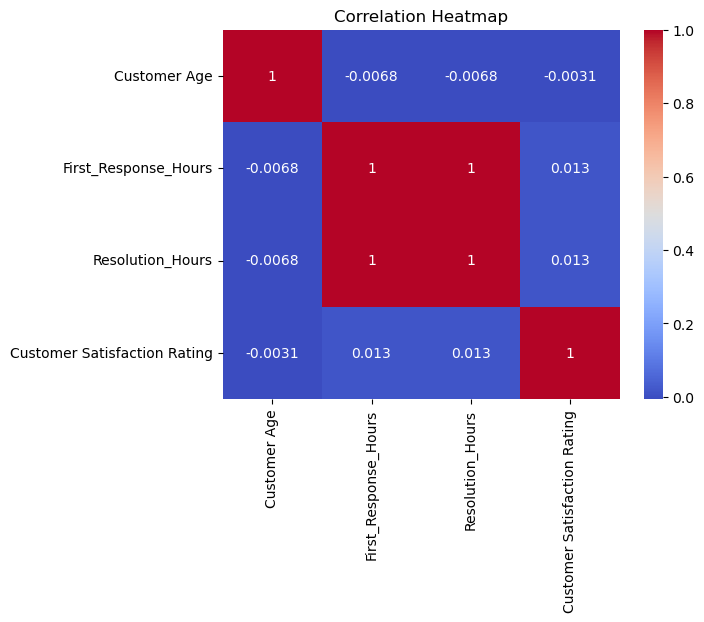

In [36]:
#Correlation between numerical columns:

numerical_cols = ['Customer Age', 'First_Response_Hours', 'Resolution_Hours', 'Customer Satisfaction Rating']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [37]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


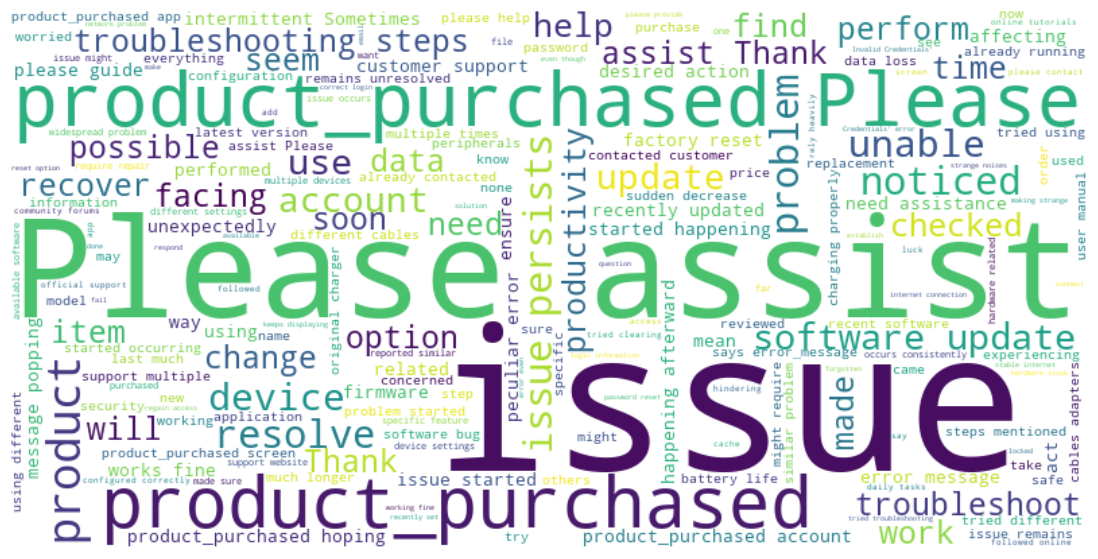

In [38]:
from wordcloud import WordCloud

text = " ".join(df['Ticket Description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(30,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [129]:
#Feature Engineering

df['Response_Speed'] = pd.cut(df['First_Response_Hours'], bins=[0,1,5,1000], labels=['Fast','Medium','Slow'])


In [130]:
df['Resolution_Speed'] = pd.cut(df['Resolution_Hours'], bins=[0,2,10,1000], labels=['Quick','Average','Slow'])


In [131]:
df['Resolution_Delay'] = df['Resolution_Hours'] - df['First_Response_Hours']


In [132]:
priority_map = {'High':3, 'Medium':2, 'Low':1}
df['Ticket_Priority_Num'] = df['Ticket Priority'].map(priority_map)

In [133]:
df['Description_Length'] = df['Ticket Description'].apply(lambda x: len(str(x).split()))


In [134]:
df['Description_Punctuations'] = df['Ticket Description'].apply(lambda x: sum([1 for c in str(x) if c in "!?."]))


In [135]:
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Ticket Description'])

In [136]:
df['Purchase_Weekday'] = df['Date of Purchase'].dt.weekday  # 0=Monday, 6=Sunday


In [137]:
df['Purchase_Month'] = df['Date of Purchase'].dt.month


In [138]:
df['High_Risk_Ticket'] = ((df['Description_Length']>50) & (df['Ticket_Priority_Num']>2) & (df['Resolution_Speed']=='Slow')).astype(int)


In [139]:
#Model Bulding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [140]:
y = df['Customer Satisfaction Rating']


num_features = ['Customer Age', 'First_Response_Hours', 'Resolution_Hours', 
                'Resolution_Delay', 'Description_Length', 'Description_Punctuations']
X_num = df[num_features]


cat_features = ['Ticket Type', 'Ticket Priority', 'Ticket Channel', 
                'Product Purchased', 'Ticket Status', 'Response_Speed', 
                'Resolution_Speed', 'Purchase_Weekday', 'Purchase_Month', 'High_Risk_Ticket']

X_cat = pd.get_dummies(df[cat_features], drop_first=True)


X_cat = X_cat.astype(float)


tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Ticket Description'].astype(str))  # ensure text is string


X = hstack([X_text, np.array(X_num, dtype=float), np.array(X_cat, dtype=float)])


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [53]:
# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R2 Score:", r2)
print("RMSE:", rmse)


R2 Score: 0.41912924937366636
RMSE: 1.1063319420488764


D:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
pip install xgboost


In [55]:
import xgboost as xgb

In [56]:
# Target
y = df['Customer Satisfaction Rating']

# Numerical Features
num_features = ['Customer Age', 'First_Response_Hours', 'Resolution_Hours', 
                'Resolution_Delay', 'Description_Length', 'Description_Punctuations']
X_num = df[num_features].astype(float)

# Categorical Features
cat_features = ['Ticket Type', 'Ticket Priority', 'Ticket Channel', 
                'Product Purchased', 'Ticket Status', 'Response_Speed', 
                'Resolution_Speed', 'Purchase_Weekday', 'Purchase_Month', 'High_Risk_Ticket']

X_cat = pd.get_dummies(df[cat_features], drop_first=True).astype(float)

# Text Features
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Ticket Description'].astype(str))

# Combine all features
X = hstack([X_text, np.array(X_num), np.array(X_cat)])


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [59]:
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("XGBoost R2 Score:", r2)
print("XGBoost RMSE:", rmse)


XGBoost R2 Score: 0.35733127037805323
XGBoost RMSE: 1.1636953040893032


D:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
# Target
y = df['Customer Satisfaction Rating']

# Numerical features
num_features = ['Customer Age', 'First_Response_Hours', 'Resolution_Hours',
                'Resolution_Delay', 'Description_Length', 'Description_Punctuations']
X_num = df[num_features].astype(float)

# Categorical features
cat_features = ['Ticket Type', 'Ticket Priority', 'Ticket Channel', 'Product Purchased', 
                'Ticket Status', 'Response_Speed', 'Resolution_Speed', 
                'Purchase_Weekday', 'Purchase_Month', 'High_Risk_Ticket']
X_cat = pd.get_dummies(df[cat_features], drop_first=True).astype(float)

# Text features (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['Ticket Description'].astype(str))

# Combine all features
X = hstack([X_text, np.array(X_num), np.array(X_cat)])


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

gbr_model.fit(X_train.toarray(), y_train)  # GradientBoostingRegressor needs dense data


GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42,
                          subsample=0.8)

In [64]:
y_pred = gbr_model.predict(X_test.toarray())

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Gradient Boosting R2 Score:", r2)
print("Gradient Boosting RMSE:", rmse)


Gradient Boosting R2 Score: 0.35832715567475404
Gradient Boosting RMSE: 1.1627933181195806


D:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Model
gbr = GradientBoostingRegressor(random_state=42)

# Reduced parameter grid for speed
param_grid = {
    'n_estimators': [100, 150, 200],      # Fewer values
    'learning_rate': [0.05, 0.1, 0.15],  # Small set
    'max_depth': [3, 4],                  # Limited depth
    'subsample': [0.8, 1.0]               # Two values only
}

# Randomized Search with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=5,        # Only 5 random combinations
    scoring='r2',
    cv=2,            # 2-fold cross-validation for speed
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model (convert sparse to dense)
random_search.fit(X_train.toarray(), y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test.toarray())

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Tuned Gradient Boosting R2 Score:", r2)
print("Tuned Gradient Boosting RMSE:", rmse)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.15}
Tuned Gradient Boosting R2 Score: 0.33129717100311395
Tuned Gradient Boosting RMSE: 1.1870315921229695


D:\python\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Target (Convert to int if needed)
y = df['Customer Satisfaction Rating'].astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight='balanced'  # helps if classes are imbalanced
)

# Train model (convert sparse to dense)
rf_model.fit(X_train.toarray(), y_train)

# Predictions
y_pred = rf_model.predict(X_test.toarray())

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.5371900826446281

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.49      0.53       329
           2       0.44      0.64      0.52       330
           3       0.60      0.49      0.54       329
           4       0.50      0.42      0.46       297
           5       0.59      0.62      0.61       409

    accuracy                           0.54      1694
   macro avg       0.55      0.53      0.53      1694
weighted avg       0.55      0.54      0.54      1694


Confusion Matrix:
[[160  64  24  37  44]
 [ 20 210  29  28  43]
 [ 35  63 160  32  39]
 [ 35  64  25 126  47]
 [ 20  78  30  27 254]]


In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Base model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parameter grid (small for speed)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized search for speed
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,      # 10 random combos
    cv=3,           # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model (convert sparse to dense)
random_search.fit(X_train.toarray(), y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_rf = random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test.toarray())

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Random Forest Accuracy: 0.6369539551357734

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.64      0.62       329
           2       0.70      0.64      0.67       330
           3       0.62      0.63      0.63       329
           4       0.60      0.52      0.56       297
           5       0.65      0.72      0.68       409

    accuracy                           0.64      1694
   macro avg       0.64      0.63      0.63      1694
weighted avg       0.64      0.64      0.64      1694


Confusion Matrix:
 [[211  21  25  32  40]
 [ 21 212  33  18  46]
 [ 39  16 206  33  35]
 [ 47  24  31 154  41]
 [ 29  31  35  18 296]]


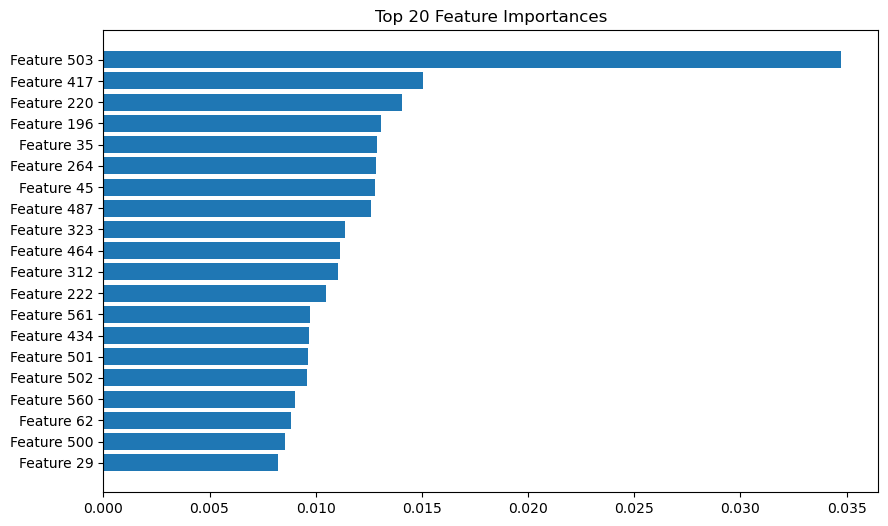

In [164]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[-20:]  # Top 20 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), feature_importances[indices])
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.title("Top 20 Feature Importances")
plt.show()
